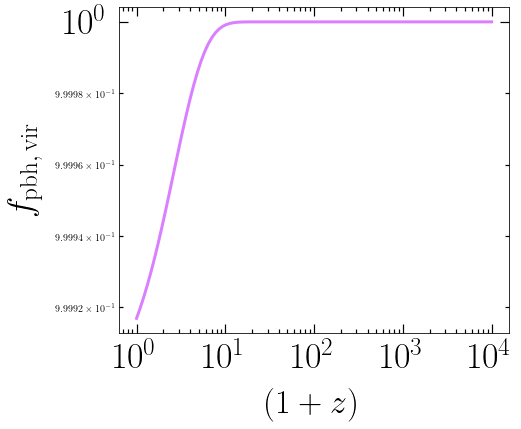

In [29]:
from scipy.integrate import quad
import numpy as np
from scipy.integrate import odeint
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.integrate as spi
from scipy.integrate import solve_ivp
from scipy import integrate
import matplotlib.ticker
from mpmath import *
from scipy.optimize import bisect, brentq, newton, root
from PRaccretion import*
import math
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})



def c_s(z):
    return c_s_Ricotti(z)


def M_2σ(z):
    return 8.8e12 * np.exp(-1.8 * (1+z))



def M_i(z):
        return (γ * (c**3) * t_ta_Jangra(z))/G
    
    
def σ_min(z):
    def M_min(z):
        return  M_2σ(z)
    return 10.2 - 0.79 * np.log(M_min(z))


def v_p(z): # in units of pc/yr
    def M_2σ(z):
        return 8.8e12 * np.exp(-1.8 * (1+z))
    return 17 * ((M_2σ(z) * 1e-8)**(1/3)) * (((1+z)/10)**(1/2)) * 1e3 * (yr/pc)


def f_pbh_vir(z):
    #δ_c = 200
    #def v(z):
        #return δ_c/σ_min(z)
    return  1 - math.erf(v_p(z)/np.sqrt(2))




colors = ['C6', 'C5','C4','C3','C2', 'C1', 'C0']
fig,ax = plt.subplots(1, figsize = (7, 6))
plt.rc('lines', linewidth = 3)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')




z_array = np.geomspace(1e4, 1, 100)
f_pbh_vir_arr = np.zeros(len(z_array))




for i, z in enumerate(z_array):
    f_pbh_vir_arr[i] =f_pbh_vir(z)
    

    
             
ax.loglog(z_array, f_pbh_vir_arr, color ='#da80ff')  #e617ed      



ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)

plt.xticks(fontsize = 36)
plt.yticks(fontsize = 36)




plt.ylabel(r"$f_\mathrm{pbh,\,vir}$ ", fontsize = 36, labelpad = 13)
plt.xlabel(r"$\left(1+z\right)$", fontsize = 34, labelpad = 13)
plt.savefig('f_pbh.pdf', bbox_inches = 'tight')
plt.show()